# Operability Analysis of an Air Separation Plant Simulated in Unisim® Design using Opyrability.

Author: Ulysses Ferreira, Federal University of Uberlândia PhD Student

This notebook demonstrates the integration between process simulations in Unisim® Design and the Python language, with the objective of performing operability analyses using the Opyrability library. As an example, we present the simulation of a simplified Air Separation Unit (ASU), highlighting that this integration approach is applicable to any type of plant. For more details on the model used in this demonstration, consult {cite}`ferreira25`.
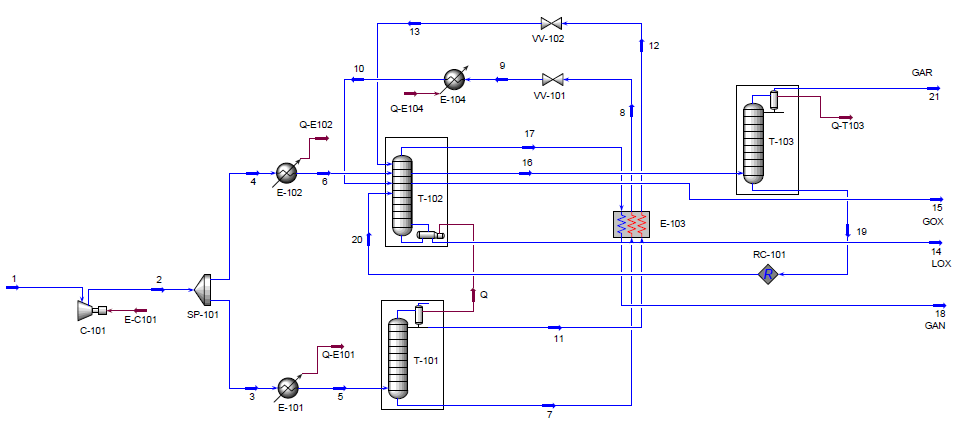

*Figure 1: Air Separation Unit (ASU) process flow diagram.*

In an Air Separation Unit (ASU) plant, the production of gases is impacted by several variables. For example purposes, we'll focus on two main inputs: the inlet air flow rate, which determines the total amount of raw material, and the stream splitter SP-101, which regulates the distribution of internal flows and, consequently, the proportion of generated products.     
Defining the inputs and outputs of the example:

| Input (AIS)                | Output (AOS)                 |
|---------------------------|------------------------------|
| SP-101 Ratio     | Gas AR Production [kmol/h]          |
| Feed Flow Rate [kmol/h]    | Gas O2 Production [kmol/h]       |
|       |                              |


**Requirements:** This notebook requires a working installation and license of Unisim® Design on a Windows machine, along with the necessary Python libraries (`opyrability`, `numpy`, `matplotlib`, `pywin32`).
     
Let's start by importing the necessary libraries:

In [17]:
import win32com.client as win32
import matplotlib.pyplot as plt
import time
import numpy as np
from opyrability import AIS2AOS_map, multimodel_rep

Opyrability communicates with the ASU plant simulated in UniSim® Design via UniSim's Spreadsheet object. All AIS and AOS variables must be imported into the corresponding Spreadsheet. Figure 2 demonstrates an example of this integration.

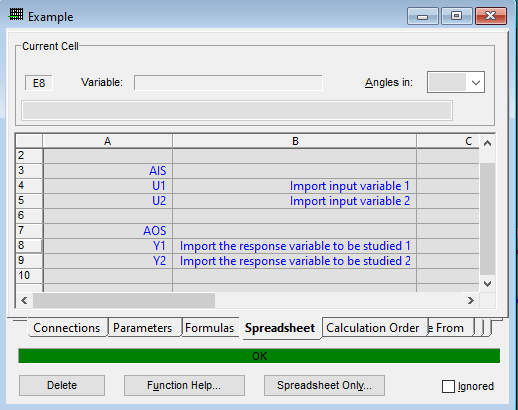

*Figure 2: Example of integration between Opyrability and UniSim® Design through the Spreadsheet object.*
     
In this demonstration, we will import 2 input variables and investigate 2 outputs. This will lead to the spreadsheet being filled as shown in Figure 3.

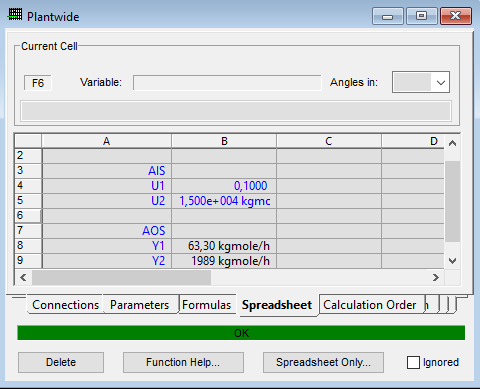

*Figure 3: AIS and AOS imported into the Spreadsheet named Plantwide.*

Once the configuration for importing AIS and AOS variables is finalized in the UniSim® Design environment, code execution can be initiated. The first step in this process is initializing the interface with UniSim® via a Python script.

In [4]:
# UniSim Initialization
unis = win32.Dispatch('UniSimDesign.Application')
arq = 'C:/Users/ulyss/Desktop/PhD/Plant_Simulation/' #Update to your directory path
Case = unis.SimulationCases.Open(arq + 'ASU - Example.usc') #Update with your simulation name
Case.Visible = 1

In [6]:
# Access to the spreadsheet
spread_sheet_1 = Case.Flowsheet.Operations.Item('Plantwide') #Update with your spreadsheet name

Next, a function is developed to also specify the spreadsheet cells where the AIS and AOS data are located.
Furthermore, it is worth noting that handling flow rate variables as input requires a unit conversion in Python, as UniSim® Design correlates them at a ratio of 1:3600. Unlike other variables such as pressure, ratio, or temperature – which have a 1:1 correlation – flow rate variables are the only ones that require this specific adjustment.

In [12]:
def calculate_y(u):
        # Defining the u inputs in the UniSim spreadsheet
        y = np.zeros(2)
        x = u[1] / 3600
        spread_sheet_1.Cell('B5').CellValue = x
        spread_sheet_1.Cell('B4').CellValue = u[0]
        
        # Waiting for UniSim to calculate the outputs
        time.sleep(3)  # Adjust as necessary.
        
        # Obtaining the y outputs from the UniSim spreadsheet.
        
        y[0] = spread_sheet_1.Cell('B8').CellValue
        y[1] = spread_sheet_1.Cell('B9').CellValue
                 
        y = np.array([y[0],y[1]])
        
        # Printing the input and output values
        print(f"Inputs: {u}, Outputs: {y}")
        return y  

Subsequently, one can input the lower and upper bounds for the inputs and also define the resolution.                                                   
SP-101 Ratio range: 0 - 0.1                                                                          
Feed Flow Rate range: 9000 - 15000 kmol/h                                                             
Resolution: 5 x 5 grid = 25 simulations

In [14]:
AIS_bounds =  np.array([[0, 0.1],
                        [9000, 15000]])

model = calculate_y
resolution = [5, 5]

Inputs: [   0. 9000.], Outputs: [  66.33692 1106.59502]
Inputs: [0.0, 9000.0], Outputs: [  66.33692 1106.59502]
Inputs: [0.025, 9000.0], Outputs: [ 66.53944 957.39817]
Inputs: [0.05, 9000.0], Outputs: [ 66.68426 804.55796]
Inputs: [0.07500000000000001, 9000.0], Outputs: [ 66.3814  655.96231]
Inputs: [0.1, 9000.0], Outputs: [  37.97926 1193.54684]
Inputs: [0.0, 10500.0], Outputs: [  77.39309 1291.0265 ]
Inputs: [0.025, 10500.0], Outputs: [  77.6293  1116.97392]
Inputs: [0.05, 10500.0], Outputs: [ 77.79839 938.65481]
Inputs: [0.07500000000000001, 10500.0], Outputs: [ 77.44486 765.30242]
Inputs: [0.1, 10500.0], Outputs: [  44.31016 1392.3349 ]
Inputs: [0.0, 12000.0], Outputs: [  88.44924 1475.46678]
Inputs: [0.025, 12000.0], Outputs: [  88.71926 1276.52703]
Inputs: [0.05, 12000.0], Outputs: [  88.91242 1072.75102]
Inputs: [0.07500000000000001, 12000.0], Outputs: [ 88.50846 874.63428]
Inputs: [0.1, 12000.0], Outputs: [  50.63953 1591.52426]
Inputs: [0.0, 13500.0], Outputs: [  99.50539 1659

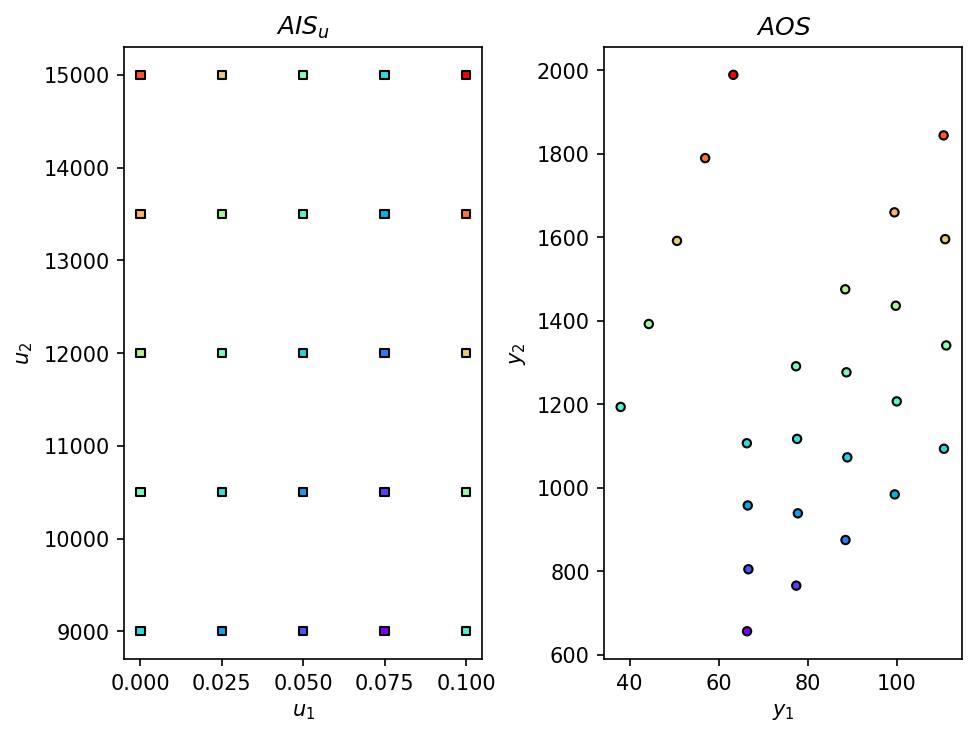

In [76]:
AIS, AOS = AIS2AOS_map(model, AIS_bounds, resolution, plot=True)

Computing AIS to AOS mapping...                                                                      
With the chosen resolution, the execution of 25 different simulations takes approximately 1.25 minutes to complete.                                                                                 
We can also generate a visualization of the Achievable Output Space (AOS) using the multimodel_rep function from opyrability (takes approximately the same time as the AIS2AOS_map).

Inputs: [   0. 9000.], Outputs: [  66.33692 1106.59581]
Inputs: [0.0, 9000.0], Outputs: [  66.33692 1106.59581]
Inputs: [0.025, 9000.0], Outputs: [ 66.53944 957.39779]
Inputs: [0.05, 9000.0], Outputs: [ 66.68431 804.57373]
Inputs: [0.07500000000000001, 9000.0], Outputs: [ 66.38137 655.9631 ]
Inputs: [0.1, 9000.0], Outputs: [  37.97853 1193.76353]
Inputs: [0.0, 10500.0], Outputs: [  77.39309 1291.03029]
Inputs: [0.025, 10500.0], Outputs: [  77.6294  1116.95434]
Inputs: [0.05, 10500.0], Outputs: [ 77.79842 938.64997]
Inputs: [0.07500000000000001, 10500.0], Outputs: [ 77.44488 765.31089]
Inputs: [0.1, 10500.0], Outputs: [  44.31272 1392.08833]
Inputs: [0.0, 12000.0], Outputs: [  88.44924 1475.45885]
Inputs: [0.025, 12000.0], Outputs: [  88.7192  1276.54163]
Inputs: [0.05, 12000.0], Outputs: [  88.91237 1072.74523]
Inputs: [0.07500000000000001, 12000.0], Outputs: [ 88.50842 874.6357 ]
Inputs: [0.1, 12000.0], Outputs: [  50.63745 1591.58408]
Inputs: [0.0, 13500.0], Outputs: [  99.5054  1659

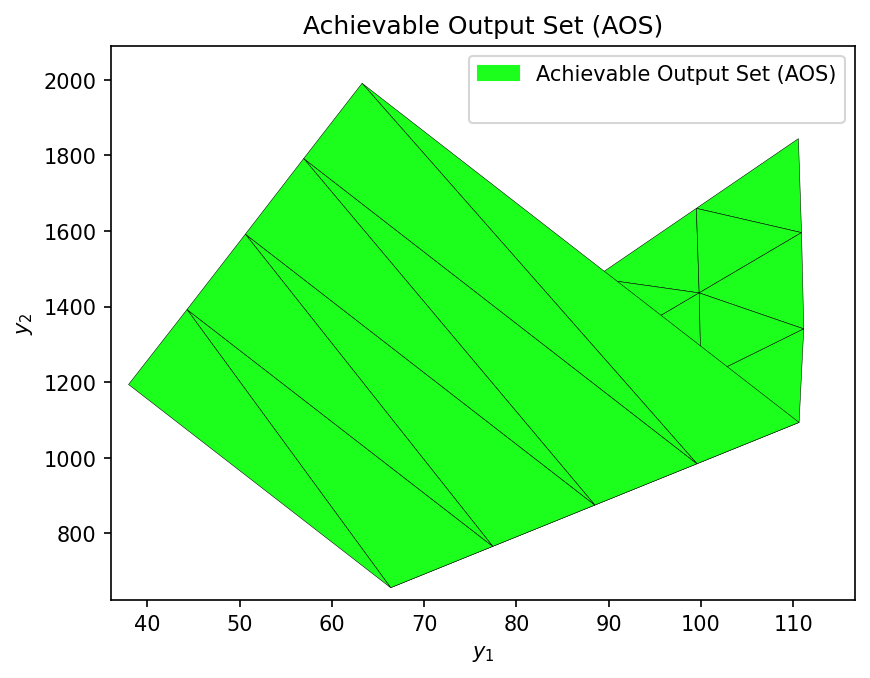

In [16]:
# Generate the AOS region representation
AOS_region = multimodel_rep(model, AIS_bounds, resolution)
plt.show()

Once the Achievable Output Set (AOS) is defined, we can establish a Desired Output Set (DOS). Based on these two sets, we evaluate the Operability Index (IO), which quantifies the fraction of the DOS that is effectively achievable by the process, i.e., the portion of the DOS contained within the AOS.
For example, suppose that to meet market demand, a production of argon between 35 and 55 kmol/h and of oxygen gas between 1000 and 1400 kmol/h is required. These production ranges would constitute the DOS for this scenario.

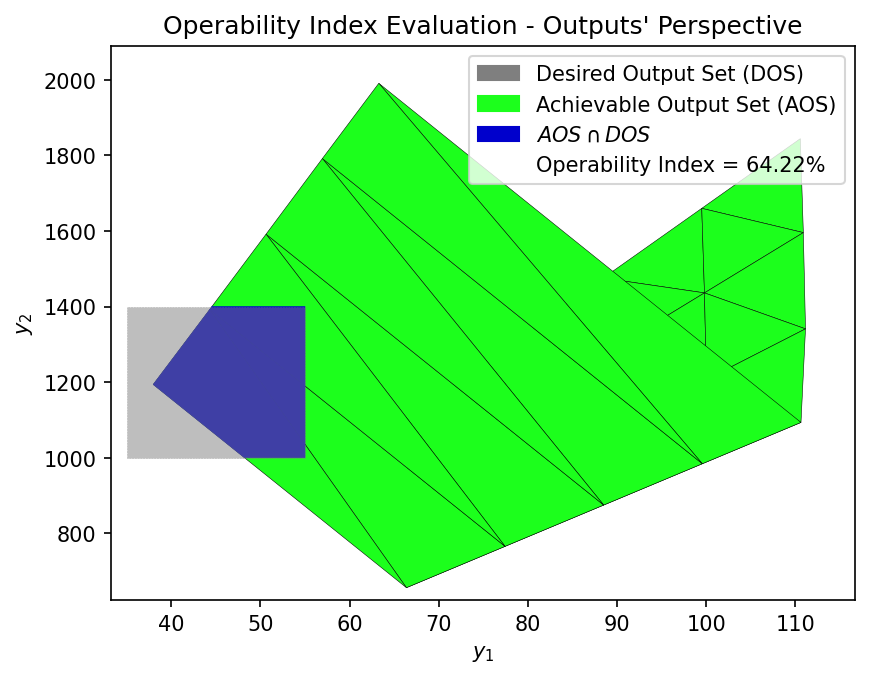

In [18]:
from opyrability import OI_eval

DOS_bounds = np.array([
    [35, 55],  # Gas AR Production [kmol/h]
    [1000, 1400]  # Gas O2 Production [kmol/h]
])

OI = OI_eval(AOS_region, DOS_bounds)

The graph in question displays the Achievable Output Set (AOS) and the Desired Output Set (DOS), as previously defined. An Operability Index (IO) of 64.22% was calculated, which means this is the proportion of the argon and oxygen gas production targets that the system can achieve, considering the analyzed ranges of inlet flow rate and the SP-101 split ratio. This value demonstrates the capacity of the ASU (Air Separation Unit) to satisfy the established production demands. The intersection area, highlighted in the graph, indicates the specific operating points where the process capabilities align with the desired objectives.